# 作業

以正確的副檔名下載網頁中的圖片
範例網頁:https://www.ptt.cc/bbs/Beauty/M.1556291059.A.75A.html

Note：因為 PTT 會詢問「是否滿 18 歲」，這邊可以用 cookies 繞過

`requests.get(URL, cookies={'over18': '1'}`


In [1]:
import requests
import os

from bs4 import BeautifulSoup
from PIL import Image

In [2]:
url = 'https://www.ptt.cc/bbs/Beauty/M.1556291059.A.75A.html'
resp = requests.get(url, cookies={'over18': '1'})
soup = BeautifulSoup(resp.text)

In [3]:
# 決定要儲存的資料夾
output_dir = 'downloads'

# 假如資料夾不存在就新增一個資料夾
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [4]:
# 定位所有圖片的 tag
image_tags = soup.find(id='main-content').findChildren('a', recursive=False)

In [5]:
i = 0
for img in image_tags:
    i = i + 1
    print(i, img['href'])

1 https://imgur.com/Cgb5oo1
2 https://imgur.com/MgjHY4f
3 https://imgur.com/yeoRtAs
4 https://imgur.com/wsauNEW
5 https://imgur.com/IjiETcs


In [6]:
i = 0
for img in image_tags:
    i = i + 1
    if 'imgur' not in img['href']:
        continue
    img_id = img['href'].split('/')[-1]
    img_url = 'https://i.imgur.com/{}.jpg'.format(img_id)
    print(i, img['href'], " -> ", img_url, "+", img_id)

1 https://imgur.com/Cgb5oo1  ->  https://i.imgur.com/Cgb5oo1.jpg + Cgb5oo1
2 https://imgur.com/MgjHY4f  ->  https://i.imgur.com/MgjHY4f.jpg + MgjHY4f
3 https://imgur.com/yeoRtAs  ->  https://i.imgur.com/yeoRtAs.jpg + yeoRtAs
4 https://imgur.com/wsauNEW  ->  https://i.imgur.com/wsauNEW.jpg + wsauNEW
5 https://imgur.com/IjiETcs  ->  https://i.imgur.com/IjiETcs.jpg + IjiETcs


In [7]:
for img_tag in image_tags:
    # 取得所有圖片在第三方服務的 id
    if 'imgur' not in img_tag['href']:
        continue
    img_id = img_tag['href'].split('/')[-1]

    # 組合圖片而非網站的網址
    img_url = 'https://i.imgur.com/{}.jpg'.format(img_id)

    # 對圖片送出請求
    with requests.get(img_url, stream=True) as r:
        r.raise_for_status()
        img = Image.open(r.raw)
        img_savename = '{outdir}/{img_id}.{img_ext}'.format(
            outdir=output_dir, img_id=img_id, img_ext=img.format.lower())
        img.save(img_savename)
        print('Save image {}'.format(img_savename))

Save image downloads/Cgb5oo1.jpeg
Save image downloads/MgjHY4f.jpeg
Save image downloads/yeoRtAs.jpeg
Save image downloads/wsauNEW.jpeg
Save image downloads/IjiETcs.jpeg


downloads/MgjHY4f.jpeg


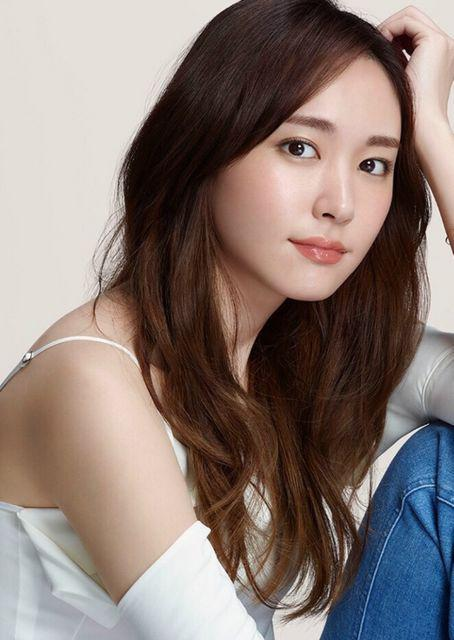

downloads/Cgb5oo1.jpeg


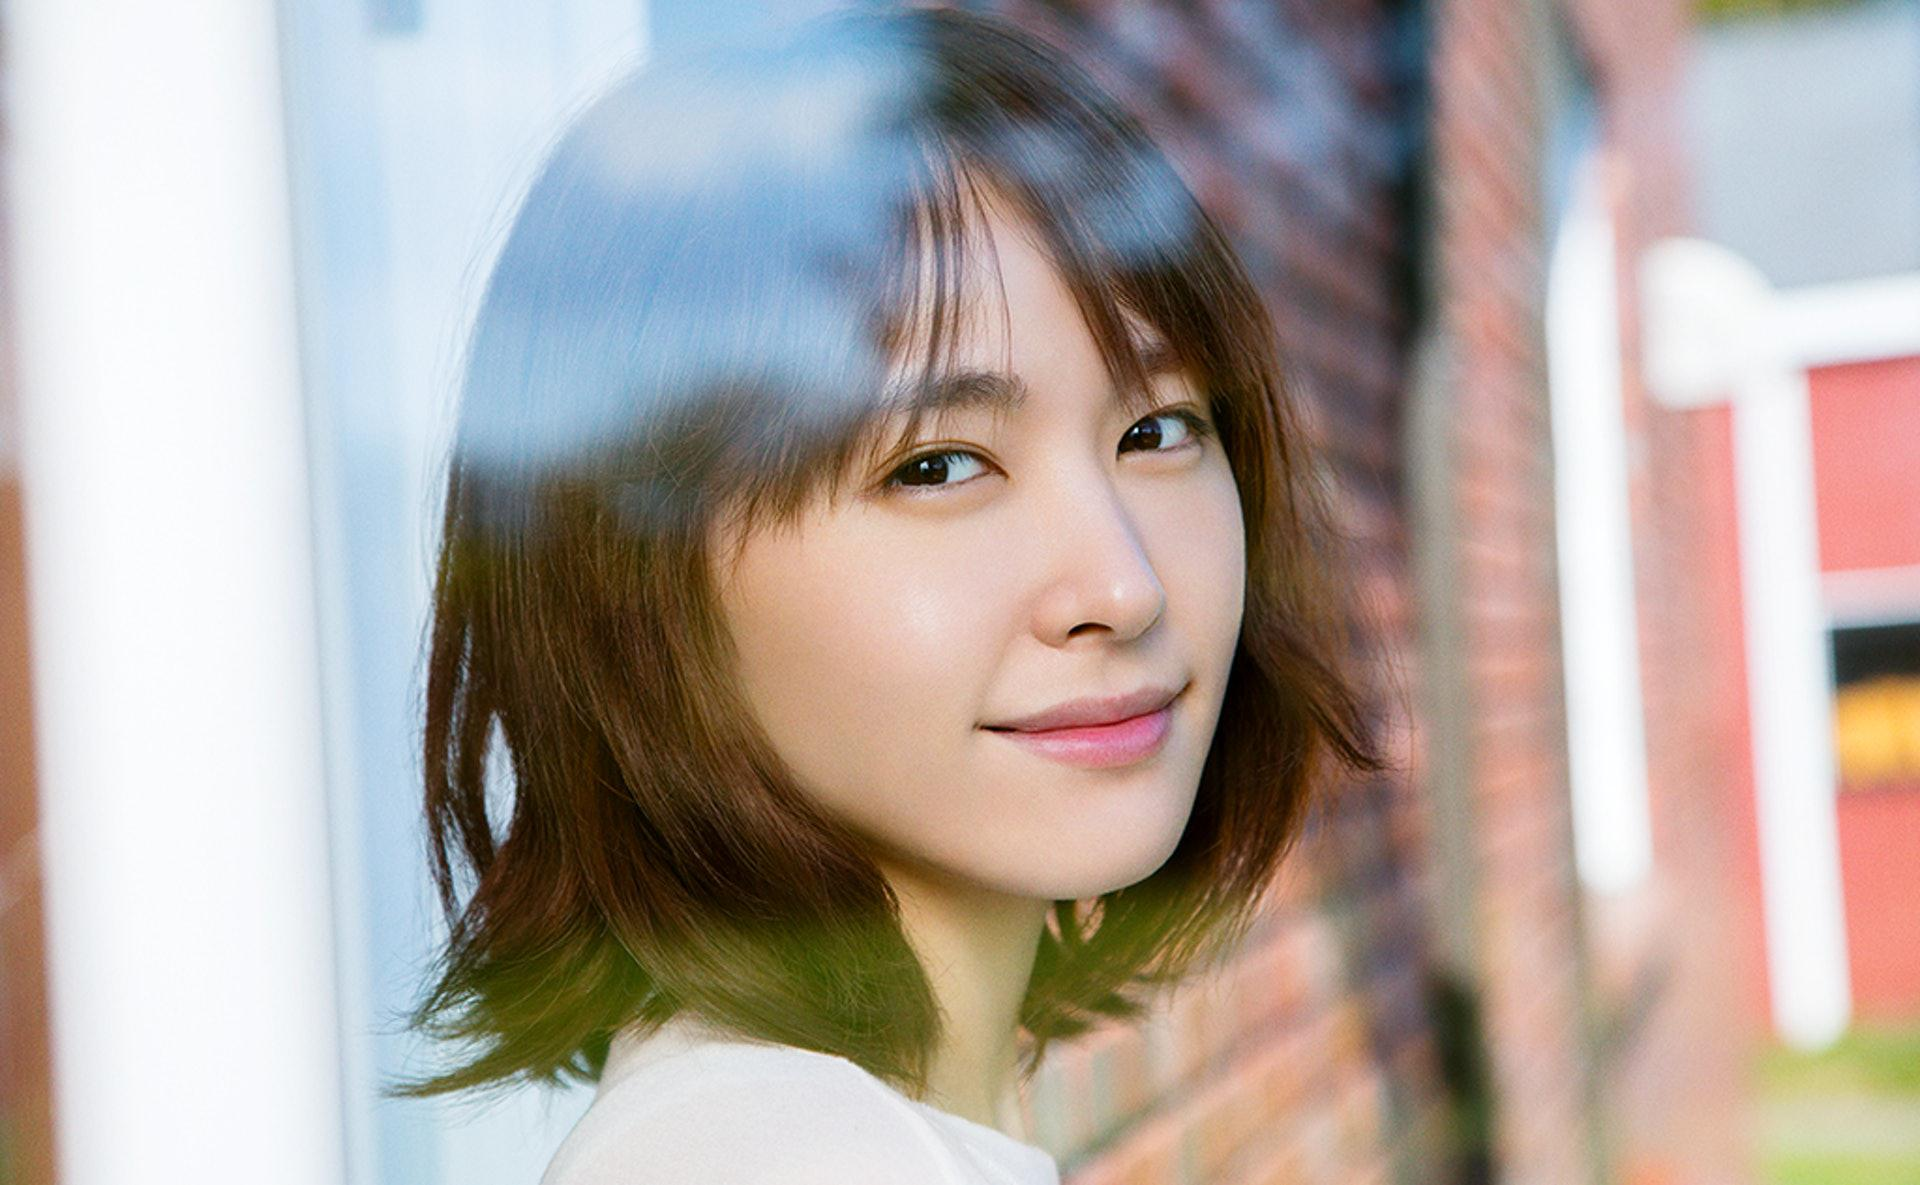

downloads/IjiETcs.jpeg


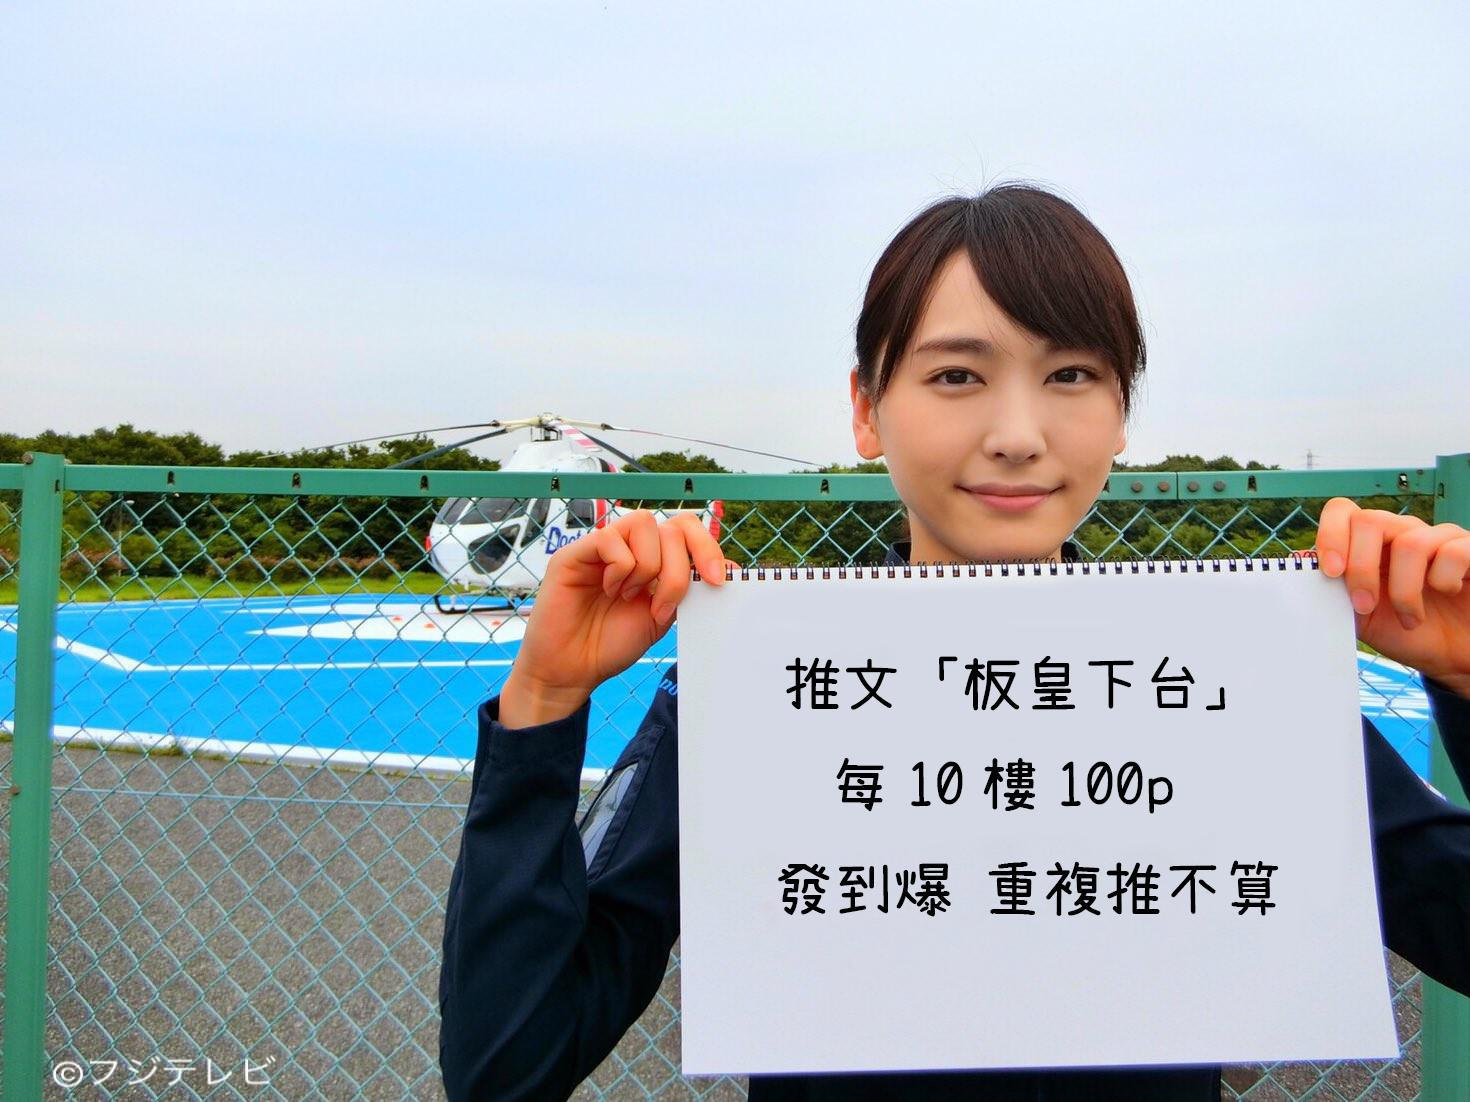

downloads/yeoRtAs.jpeg


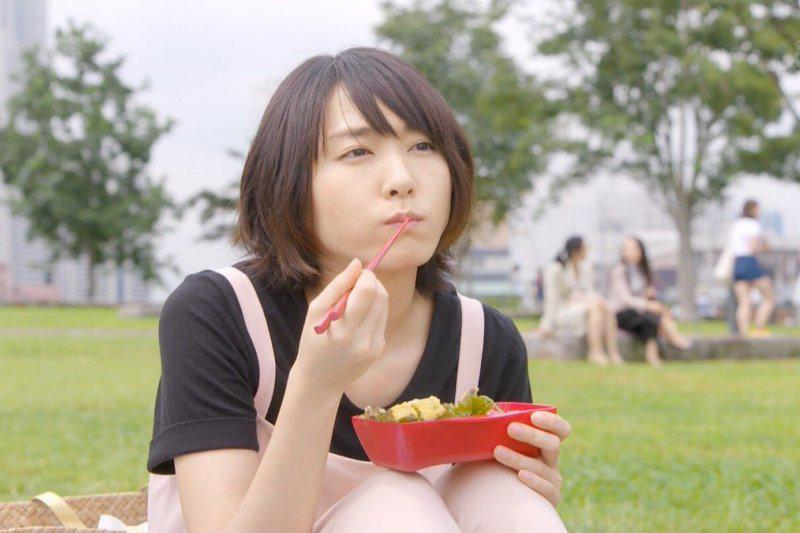

downloads/wsauNEW.jpeg


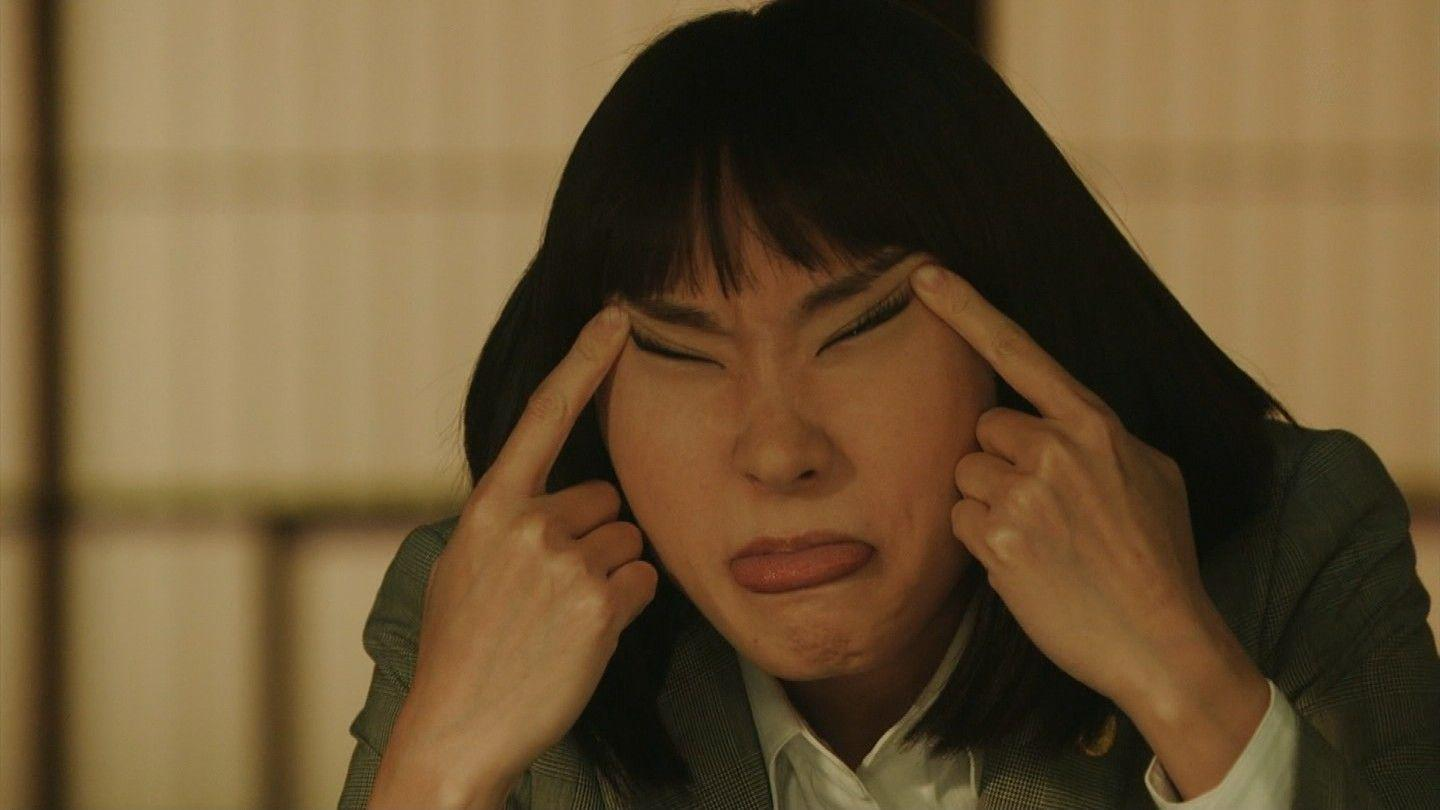

In [8]:
from IPython.display import Image 
from os import listdir

files = listdir(output_dir)
for f in files:
    p = '{dir}/{file}'.format(dir=output_dir, file=f)
    print(p)
    pil_img = Image(filename=p)
    display(pil_img)  